<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass2/bdm/Theboys/case_study1/Assignment_EDA_Theboys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TheBoys**
1. Pang Chern Hong| MCS231006
2. Nian Cong| MCS231007     
3. Wu Jiaming | MCS221033
4. Liu Kaiyuan| MCS231020

**Title:Cases of death due to COVID-19 in Malaysia**

Our data set is obtained from Ministry of Health Malaysia. The content of this data set is the number of deaths, causes of death and vaccination status during the new crown epidemic in Malaysian states, from March 17, 2020 to November 4, 2023.  We intend to analyze this data to identify a series of issues such as the development trend of COVID-19 in each state based on the increase and decrease in deaths.

## Downloading the Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
death_state = pd.read_csv("https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv")
death_state

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,Johor,1,0,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21355,2023-11-11,Selangor,0,0,0,0,0,0,0,0,0
21356,2023-11-11,Terengganu,0,0,0,0,0,0,0,0,0
21357,2023-11-11,W.P. Kuala Lumpur,0,0,0,0,0,0,0,0,0
21358,2023-11-11,W.P. Labuan,0,0,0,0,0,0,0,0,0


**The meaning of each column in the dataset**



*   date: yyyy-mm-dd format; data correct as of 1200hrs on that date

*   state: name of state (present in state file, but not country file)

*   deaths_new: deaths due to COVID-19 based on date reported to public

*   deaths_bid: deaths due to COVID-19 which were brought-in dead based on date reported to public (perfect subset of deaths_new)

*   deaths_new_dod: deaths due to COVID-19 based on date of death

*   deaths_bid_dod: deaths due to COVID-19 which were brought-in dead based on date of death (perfect subset of deaths_new_dod)

*   deaths_unvax: number of unvaccinated individuals who died due to COVID-19 based on date of death (perfect subset of deaths_new_dod).

*   deaths_pvax: number of partially-vaccinated individuals who died due to COVID-19 based on date of death (perfect subset of deaths_new_dod), where "partially vaccinated" is defined as receiving at least 1 dose of a 2-dose vaccine at least 1 day prior to testing positive, or receiving the Cansino vaccine between 1-27 days before testing positive.

*   deaths_fvax: number of fully-vaccinated who died due to COVID-19 based on date of death (perfect subset of deaths_new_dod), where "fully vaccinated" is defined as receiving the 2nd dose of a 2-dose vaccine at least 14 days prior to testing positive, or receiving the Cansino vaccine at least 28 days before testing positive.

*   deaths_boost: The number of people who died after vaccination, the number of people who died because of the vaccine.

*   deaths_tat: median days between date of death and date of report for all deaths reported on the day


After downloading the data set, it is time to clean the data.

## Data Preparation and Cleaning




Explore the number of rows & columns

In [ ]:
print("Number of rows:", len(death_state))
print("Number of columns:", len(death_state.columns))
print(death_state.columns)
print("\n")
death_state.info()

Number of rows: 21360
Number of columns: 11
Index(['date', 'state', 'deaths_new', 'deaths_bid', 'deaths_new_dod',
       'deaths_bid_dod', 'deaths_unvax', 'deaths_pvax', 'deaths_fvax',
       'deaths_boost', 'deaths_tat'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            21360 non-null  object
 1   state           21360 non-null  object
 2   deaths_new      21360 non-null  int64 
 3   deaths_bid      21360 non-null  int64 
 4   deaths_new_dod  21360 non-null  int64 
 5   deaths_bid_dod  21360 non-null  int64 
 6   deaths_unvax    21360 non-null  int64 
 7   deaths_pvax     21360 non-null  int64 
 8   deaths_fvax     21360 non-null  int64 
 9   deaths_boost    21360 non-null  int64 
 10  deaths_tat      21360 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.8+ MB


In [ ]:
#Find the range of deaths
print(death_state.describe())

         deaths_new    deaths_bid  deaths_new_dod  deaths_bid_dod  \
count  21360.000000  21360.000000    21360.000000    21360.000000   
mean       1.740964      0.370599        1.740964        0.370599   
std        7.979859      2.309134        7.754936        1.978729   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      0.000000        0.000000        0.000000   
50%        0.000000      0.000000        0.000000        0.000000   
75%        1.000000      0.000000        1.000000        0.000000   
max      359.000000     84.000000      191.000000       64.000000   

       deaths_unvax   deaths_pvax   deaths_fvax  deaths_boost    deaths_tat  
count  21360.000000  21360.000000  21360.000000  21360.000000  21360.000000  
mean       1.053745      0.295552      0.325890      0.065777      1.352715  
std        5.025206      2.349642      1.150269      0.343117      9.792564  
min       -1.000000      0.000000      0.000000      0.000000     

Check for missing and duplicate values

In [ ]:
print("Missing values:\n", death_state.isnull().sum())
print("\n")
print("Duplicate values:\n", death_state[death_state.duplicated()])

Missing values:
 date              0
state             0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64


Duplicate values:
 Empty DataFrame
Columns: [date, state, deaths_new, deaths_bid, deaths_new_dod, deaths_bid_dod, deaths_unvax, deaths_pvax, deaths_fvax, deaths_boost, deaths_tat]
Index: []


Split the date into months and days for later statistics

In [ ]:
dfsplit = death_state['date'].str.split('-',expand = True)
death_state.insert(loc = 1,column = 'year',value = dfsplit[0])
death_state.insert(loc = 2,column = 'month',value = dfsplit[1])
death_state.insert(loc = 3,column = 'day',value = dfsplit[2])
death_state

,date,year,month,day,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,2020,03,17,Johor,1,0,1,0,1,0,0,0,0
1,2020-03-17,2020,03,17,Kedah,0,0,0,0,0,0,0,0,0
2,2020-03-17,2020,03,17,Kelantan,0,0,0,0,0,0,0,0,0
3,2020-03-17,2020,03,17,Melaka,0,0,0,0,0,0,0,0,0
4,2020-03-17,2020,03,17,Negeri Sembilan,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21355,2023-11-11,2023,11,11,Selangor,0,0,0,0,0,0,0,0,0
21356,2023-11-11,2023,11,11,Terengganu,0,0,0,0,0,0,0,0,0
21357,2023-11-11,2023,11,11,W.P. Kuala Lumpur,0,0,0,0,0,0,0,0,0
21358,2023-11-11,2023,11,11,W.P. Labuan,0,0,0,0,0,0,0,0,0


Convert data type to date type

In [ ]:
death_state['date'] = pd.to_datetime(death_state['date'])

In [ ]:
print(death_state.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21360 non-null  datetime64[ns]
 1   year            21360 non-null  object        
 2   month           21360 non-null  object        
 3   day             21360 non-null  object        
 4   state           21360 non-null  object        
 5   deaths_new      21360 non-null  int64         
 6   deaths_bid      21360 non-null  int64         
 7   deaths_new_dod  21360 non-null  int64         
 8   deaths_bid_dod  21360 non-null  int64         
 9   deaths_unvax    21360 non-null  int64         
 10  deaths_pvax     21360 non-null  int64         
 11  deaths_fvax     21360 non-null  int64         
 12  deaths_boost    21360 non-null  int64         
 13  deaths_tat      21360 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage

## Exploratory Analysis and Visualization




import` matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Compute the mean, sum, and other interesting statistics for numeric columns

In [ ]:
# Select the columns to be counted
statistics = death_state.iloc[:,5:]

# Outputting the computed statistics
print("Mean:")
print(statistics.mean())
print("\nSum:")
print(statistics.sum())
print("\nMinimum Values:")
print(statistics.min())
print("\nMaximum Values:")
print(statistics.max())
print("\nMedian:")
print(statistics.median())
print("\nVariance:")
print(statistics.var())
print("\nStandard Deviation:")
print(statistics.std())


Mean:
deaths_new        1.740964
deaths_bid        0.370599
deaths_new_dod    1.740964
deaths_bid_dod    0.370599
deaths_unvax      1.053745
deaths_pvax       0.295552
deaths_fvax       0.325890
deaths_boost      0.065777
deaths_tat        1.352715
dtype: float64

Sum:
deaths_new        37187
deaths_bid         7916
deaths_new_dod    37187
deaths_bid_dod     7916
deaths_unvax      22508
deaths_pvax        6313
deaths_fvax        6961
deaths_boost       1405
deaths_tat        28894
dtype: int64

Minimum Values:
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax     -1
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64

Maximum Values:
deaths_new        359
deaths_bid         84
deaths_new_dod    191
deaths_bid_dod     64
deaths_unvax      119
deaths_pvax        68
deaths_fvax        17
deaths_boost        8
deaths_tat        624
dtype: int64

Median:
deaths_new        0.0
deaths_bid        0.0
deaths_new

# Display data with bar charts

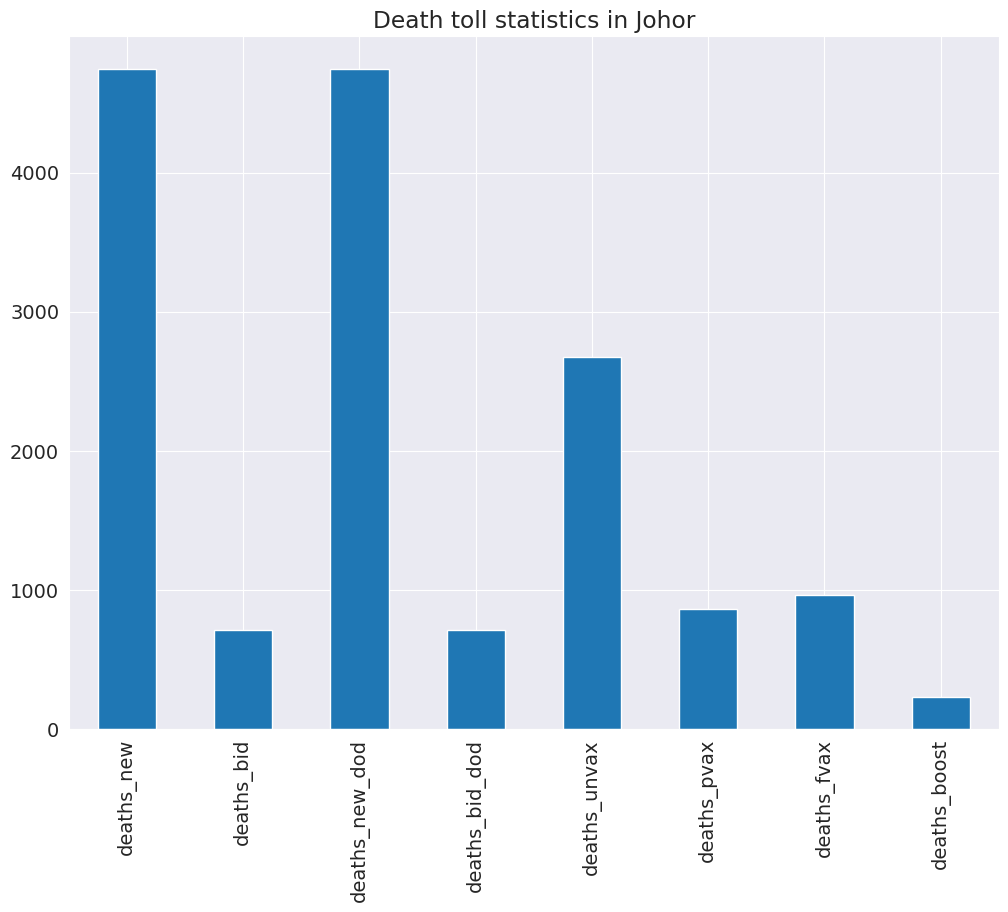

In [ ]:
Johor_data = death_state[death_state['state'] == 'Johor'].iloc[:,5:13].sum()
Johor_data.plot(kind='bar', stacked=True)
plt.title('Death toll statistics in Johor')

plt.show()

# Analysis through the above chart

1. The number of deaths based on reports and those based on date of death are the same, indicating that all deaths in Johor are reported truthfully

2. The number of deaths among those who have not been vaccinated is much higher than the number of deaths among those who have been vaccinated (even if they are only partially vaccinated), indicating that the vaccine has a certain effect


Text(0.5, 1.0, 'Epidemic death toll trends in Johor')

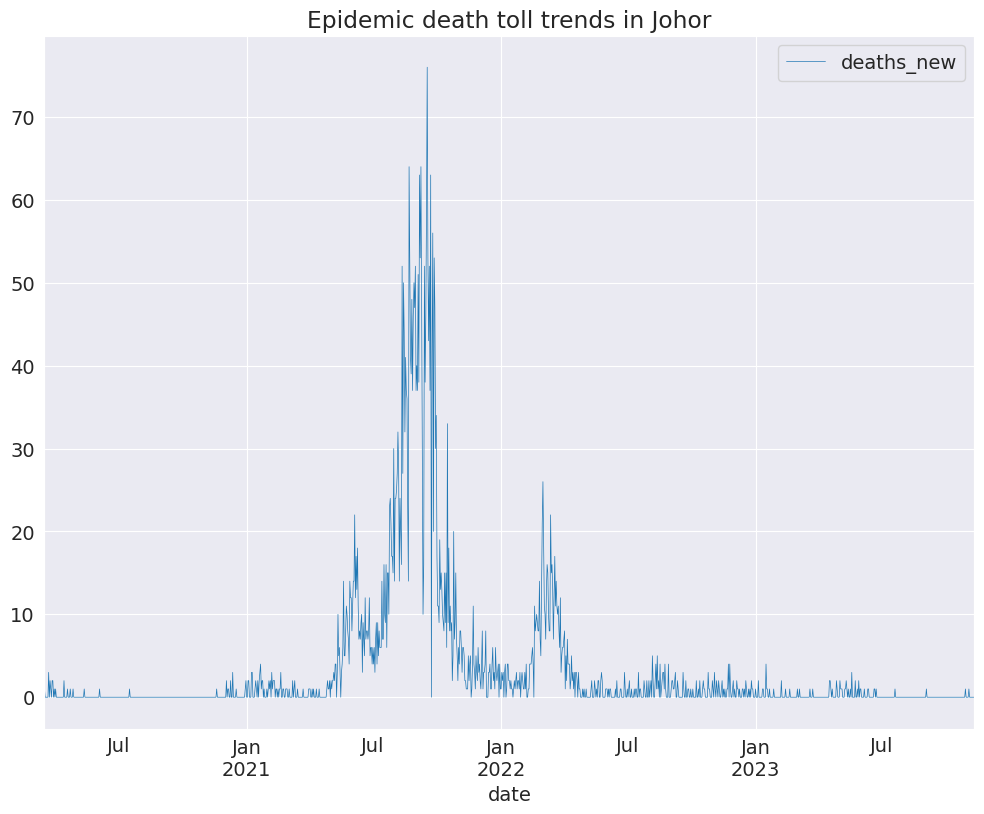

In [ ]:
date_death = death_state.iloc[:,[0,5]][death_state['state'] == 'Johor']
date_death.plot(x='date',linewidth = 0.5)
plt.title('Epidemic death toll trends in Johor')

# Analysis through the above chart
1. The COVID-19 epidemic in Johor began to spread on a large scale for the first time around April to June 2021, and broke out on a large scale after July. At this time, the number of people who died from the COVID-19 epidemic reached its peak, with a maximum of more than 70 deaths in one day.

2. After entering October 2021, the new crown epidemic was contained, until February 2022 ushered in the second spread.

3. After April 2022, the COVID-19 epidemic was effectively controlled and the death toll remained at a very low level. Until 2023, very few people will die due to the epidemic


## Asking and Answering Questions



We employed libraries like matplot, seaborn and pandas in order to visulaize our data.
1. **Pandas**:
    - **Purpose**: library used for data manipulation in dataframe.
    - **Usage**: Ease for the data analysis by filtering, grouping, and able to do the statistical calculation.

2. **Matplotlib**:
    - **Purpose**: Library that enable us to plot the graph based on the data provided in varios styles, such as static, animated, and interactive.
    - **Usage**: Visualize the input data from various of data structure by using different types of charts such as bar chart, pie chart and the others.

3. **Seaborn**:
    - **Purpose**: Statistical data visualization library built on top of Matplotlib.
    - **Usage**: perform the necessary semantic mapping to create advanced and aesthetically pleasing statistical plots (e.g., KDE plots)

In summary, Pandas is library that do data handling and manipulation, Matplotlib is the library for creating basic visualizations, while Seaborn is more advanced to make more complex statistical visualizations and able to enhance the aesthetics of plots.



#### Q1: What is the death rate after partially and fully vaccinated?

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv")

df["date"] = pd.to_datetime(df['date'])

Vaccinated_data = df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_pvax"] + df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_fvax"]

Vaccinated_data = Vaccinated_data

print(Vaccinated_data)


date
2020-03-31       0
2020-04-30       0
2020-05-31       0
2020-06-30       0
2020-07-31       0
2020-08-31       0
2020-09-30       0
2020-10-31       0
2020-11-30       0
2020-12-31       0
2021-01-31       0
2021-02-28       0
2021-03-31       1
2021-04-30       0
2021-05-31      74
2021-06-30     236
2021-07-31    2014
2021-08-31    3340
2021-09-30    2396
2021-10-31    1277
2021-11-30     856
2021-12-31     606
2022-01-31     243
2022-02-28     543
2022-03-31     998
2022-04-30     186
2022-05-31      48
2022-06-30      27
2022-07-31      84
2022-08-31      73
2022-09-30      35
2022-10-31      34
2022-11-30      82
2022-12-31      41
2023-01-31       9
2023-02-28       8
2023-03-31       6
2023-04-30      18
2023-05-31      23
2023-06-30       8
2023-07-31       1
2023-08-31       1
2023-09-30       4
2023-10-31       2
2023-11-30       0
Freq: M, dtype: int64


<ipython-input-15-8f47f51e2a85>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Vaccinated_data = df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_pvax"] + df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_fvax"]
<ipython-input-15-8f47f51e2a85>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Vaccinated_data = df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_pvax"] + df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_fvax"]


Text(0, 0.5, 'Deaths counts each month')

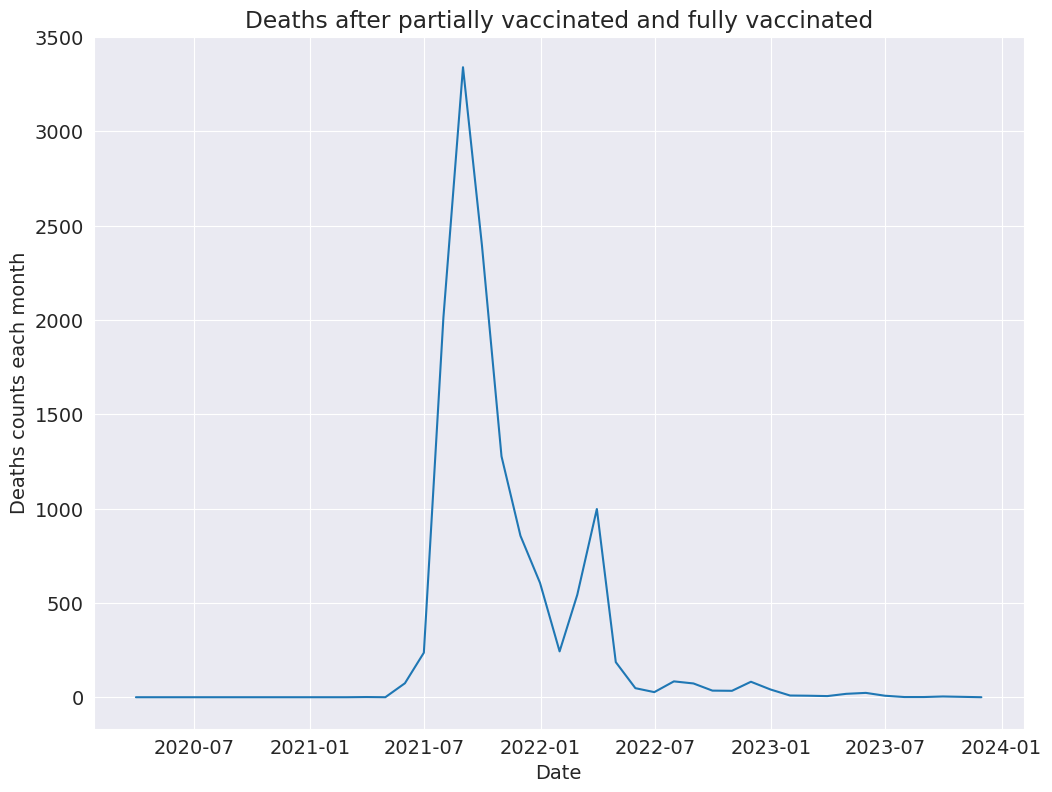

In [16]:
plt.figure()
plt.plot(Vaccinated_data)
plt.title('Deaths after partially vaccinated and fully vaccinated')
plt.xlabel('Date')
plt.ylabel('Deaths counts each month')

#### Q2: When is the outbreak period?

In [17]:
df1 = df.drop("deaths_tat", axis =1)

df1 = df1.groupby([pd.Grouper(key='date', freq='M')]).sum().sum(axis=1)

df1


<ipython-input-17-db4e52018fa8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby([pd.Grouper(key='date', freq='M')]).sum().sum(axis=1)


date
2020-03-31      148
2020-04-30      167
2020-05-31       38
2020-06-30       22
2020-07-31       16
2020-08-31        8
2020-09-30       33
2020-10-31      488
2020-11-30      436
2020-12-31      428
2021-01-31     1197
2021-02-28     1081
2021-03-31      433
2021-04-30      829
2021-05-31     4833
2021-06-30     7929
2021-07-31    19006
2021-08-31    29079
2021-09-30    24582
2021-10-31     8360
2021-11-30     4872
2021-12-31     3396
2022-01-31     1532
2022-02-28     3408
2022-03-31     7738
2022-04-30     1715
2022-05-31      437
2022-06-30      323
2022-07-31      788
2022-08-31      827
2022-09-30      496
2022-10-31      377
2022-11-30      777
2022-12-31      550
2023-01-31      227
2023-02-28       72
2023-03-31       76
2023-04-30      155
2023-05-31      296
2023-06-30      107
2023-07-31       35
2023-08-31        4
2023-09-30       34
2023-10-31       32
2023-11-30        6
Freq: M, dtype: int64

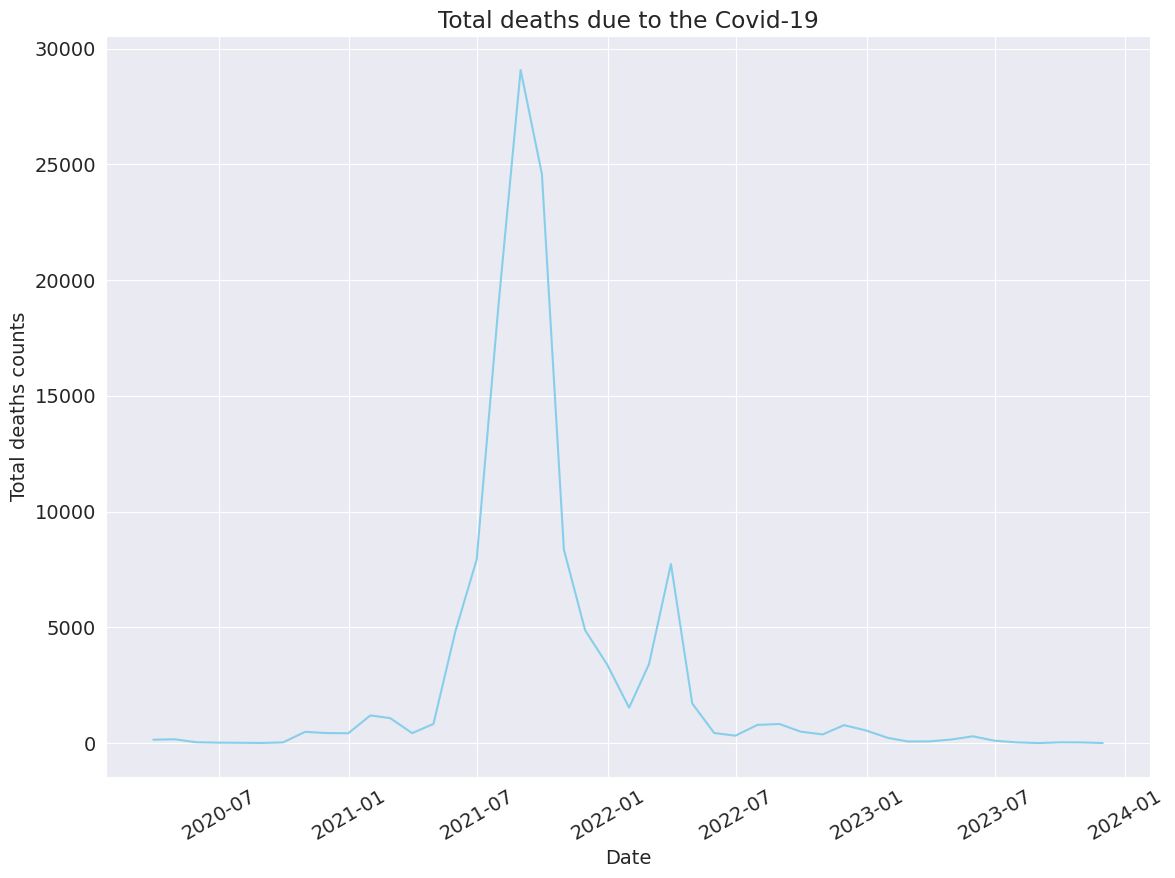

In [18]:
plt.figure()
plt.plot(df1, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total deaths counts')
plt.title('Total deaths due to the Covid-19')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

we can observe that the peak is on the month of july of 2021, but before that the virus must be spread out so after an accumulation phase, the deaths rate spike up on that months, according to the data, we believe that the virus was spreaded out start from the September of 2020.

#### Q3: What is the effect of the Lock-Down to the death rate?

Phase 1 - MCO 1.0 from 18th March 2020 till 3rd May 2020

Phase 2 - Conditional MCO from 4th May 2020 till 9th June 2020

Phase 3 - Recovery MCO from 10th June till 31st December 2020

Phase 4 - CMCO in the areas with high COVID-19 cases from 14th December 2020 till 31st December 2020

Phase 5 - Recovery MCO from 1st January 2021 till 31st March 2021

Phase 6 - MCO 2.0 from 13th January 2021 till 4th March 2021

Phase 7 - MCO 3.0 from 1st June 2021 to 28th June 2021

In [19]:
df1_diff = df1.diff()
df1_diff

date
2020-03-31        NaN
2020-04-30       19.0
2020-05-31     -129.0
2020-06-30      -16.0
2020-07-31       -6.0
2020-08-31       -8.0
2020-09-30       25.0
2020-10-31      455.0
2020-11-30      -52.0
2020-12-31       -8.0
2021-01-31      769.0
2021-02-28     -116.0
2021-03-31     -648.0
2021-04-30      396.0
2021-05-31     4004.0
2021-06-30     3096.0
2021-07-31    11077.0
2021-08-31    10073.0
2021-09-30    -4497.0
2021-10-31   -16222.0
2021-11-30    -3488.0
2021-12-31    -1476.0
2022-01-31    -1864.0
2022-02-28     1876.0
2022-03-31     4330.0
2022-04-30    -6023.0
2022-05-31    -1278.0
2022-06-30     -114.0
2022-07-31      465.0
2022-08-31       39.0
2022-09-30     -331.0
2022-10-31     -119.0
2022-11-30      400.0
2022-12-31     -227.0
2023-01-31     -323.0
2023-02-28     -155.0
2023-03-31        4.0
2023-04-30       79.0
2023-05-31      141.0
2023-06-30     -189.0
2023-07-31      -72.0
2023-08-31      -31.0
2023-09-30       30.0
2023-10-31       -2.0
2023-11-30      -26.0
Freq:

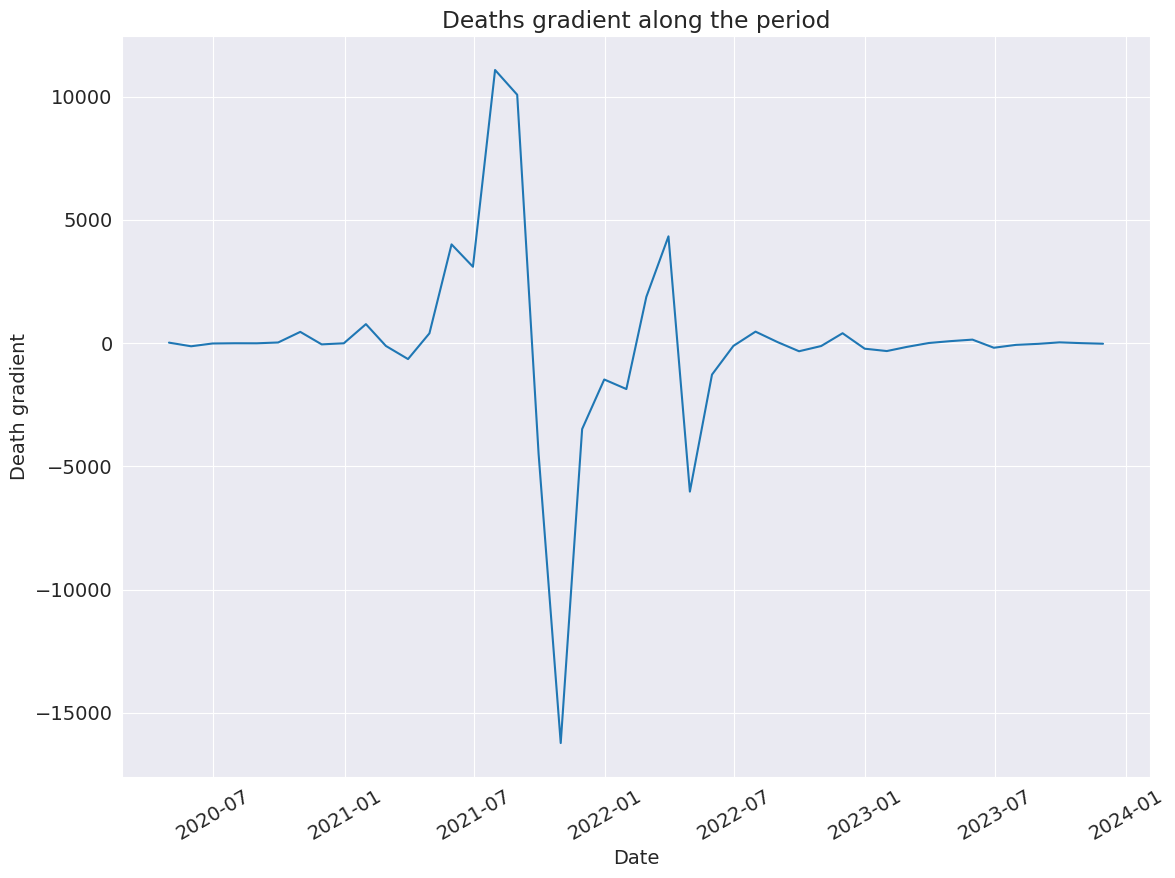

In [20]:
plt.figure()
plt.plot(df1_diff)
plt.xlabel('Date')
plt.ylabel('Death gradient')
plt.title('Deaths gradient along the period')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

We can clearly observed that the death gradients down the most when the lock down of phase 7, which we believed that give the government confident to terminate the lockdown status.

#### Q4: States with the most monthly deaths

In [21]:
state_monthly = death_state.groupby([pd.Grouper(key='date', freq='M'),'state'])['deaths_new'].sum()
idx = state_monthly.groupby('state').max()
print(idx)




state
Johor                1285
Kedah                 938
Kelantan              403
Melaka                298
Negeri Sembilan       370
Pahang                183
Perak                 379
Perlis                 47
Pulau Pinang          761
Sabah                1058
Sarawak               496
Selangor             3410
Terengganu            142
W.P. Kuala Lumpur     966
W.P. Labuan           100
W.P. Putrajaya          5
Name: deaths_new, dtype: int64


In [22]:

print(idx.diff())




state
Johor                   NaN
Kedah                -347.0
Kelantan             -535.0
Melaka               -105.0
Negeri Sembilan        72.0
Pahang               -187.0
Perak                 196.0
Perlis               -332.0
Pulau Pinang          714.0
Sabah                 297.0
Sarawak              -562.0
Selangor             2914.0
Terengganu          -3268.0
W.P. Kuala Lumpur     824.0
W.P. Labuan          -866.0
W.P. Putrajaya        -95.0
Name: deaths_new, dtype: float64


#### Q5: What is the recovery period?

We can observed from the Q2 and Q3 that after the peak of july of 2021, the death case rapidly go down and there is another peak on February 2022, we believed that the pandemic is recovered after March 2022 because the deaths cases is a result of the accumulations of patients, that cost some times from the date of infected to the date of deaths reported, so it is most likely the consecutive effect of the previous outspread of virus. Another reason behind is the vaccinated percentage on that time was growing much more bigger than 2021.

#### Q6: What is the ratio of death without vaccinated to the death which are vaccinated?

In [23]:
Vaccinated_data/df1

date
2020-03-31    0.000000
2020-04-30    0.000000
2020-05-31    0.000000
2020-06-30    0.000000
2020-07-31    0.000000
2020-08-31    0.000000
2020-09-30    0.000000
2020-10-31    0.000000
2020-11-30    0.000000
2020-12-31    0.000000
2021-01-31    0.000000
2021-02-28    0.000000
2021-03-31    0.002309
2021-04-30    0.000000
2021-05-31    0.015311
2021-06-30    0.029764
2021-07-31    0.105967
2021-08-31    0.114860
2021-09-30    0.097470
2021-10-31    0.152751
2021-11-30    0.175698
2021-12-31    0.178445
2022-01-31    0.158616
2022-02-28    0.159331
2022-03-31    0.128974
2022-04-30    0.108455
2022-05-31    0.109840
2022-06-30    0.083591
2022-07-31    0.106599
2022-08-31    0.088271
2022-09-30    0.070565
2022-10-31    0.090186
2022-11-30    0.105534
2022-12-31    0.074545
2023-01-31    0.039648
2023-02-28    0.111111
2023-03-31    0.078947
2023-04-30    0.116129
2023-05-31    0.077703
2023-06-30    0.074766
2023-07-31    0.028571
2023-08-31    0.250000
2023-09-30    0.117647
2023-1

In [28]:
df1.index

DatetimeIndex(['2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30'],
              dtype='datetime64[ns]', name='date', freq='M')

Text(0.5, 0, 'date')

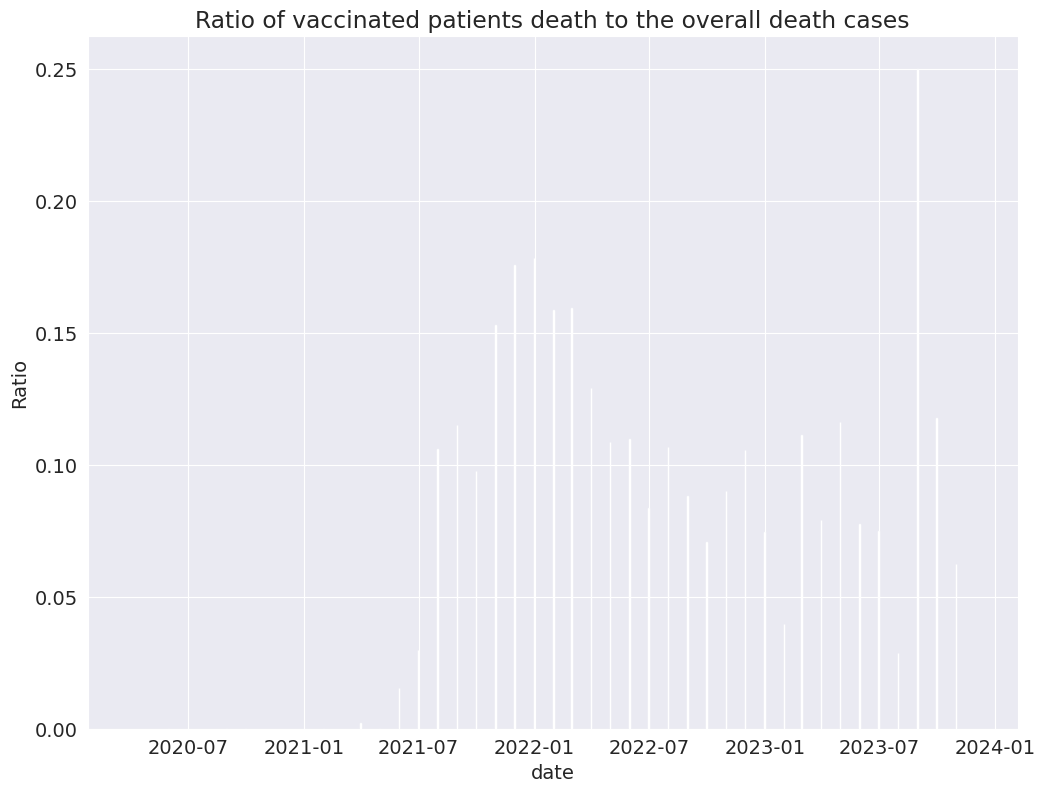

In [33]:
plt.bar(df1.index, (Vaccinated_data/df1))
plt.title("Ratio of vaccinated patients death to the overall death cases")
plt.ylabel("Ratio")
plt.xlabel("date")

#### Q7: How effecttive is the vaccine to the death cases due to Covid-19?

<ipython-input-34-ac4a15420649>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full = df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_fvax"]


Text(0, 0.5, 'Deaths counts each month')

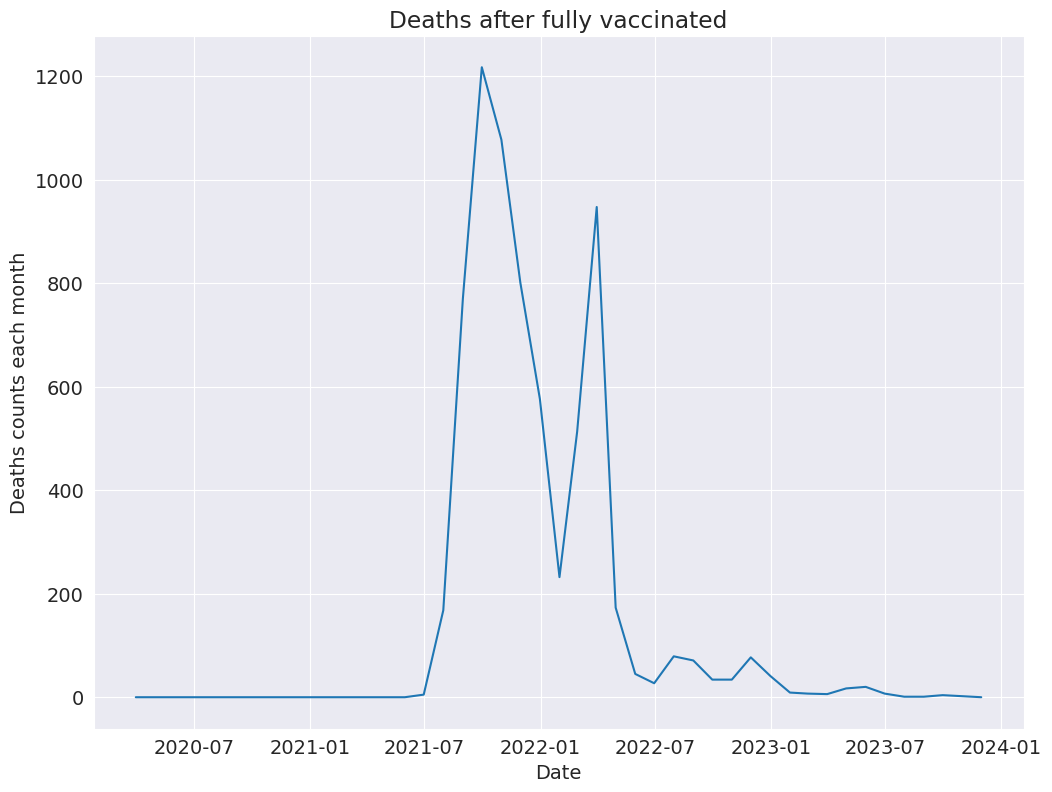

In [34]:
full = df.groupby([pd.Grouper(key='date', freq='M')]).sum()["deaths_fvax"]

plt.figure()
plt.plot(full)
plt.title('Deaths after fully vaccinated')
plt.xlabel('Date')
plt.ylabel('Deaths counts each month')

Combine with the graph from Q2, we can compare that the second peak of the fully vaccinated death cases at the February 2022 is closer to the first peak at the July 2021, and the meantime the total death cases is greatly decreased, which means that most of the people already vaccinated and that made the virus fatal damage to the society decreased.

#### Q8: What is the distribution of death cases across different states?

In [40]:
state_death = death_state.drop("deaths_tat", axis =1)
state_death = state_death.groupby('state').sum()
state_death = state_death.sum(axis=1)
state_death

<ipython-input-40-e683e658efaf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_death = state_death.groupby('state').sum()


state
Johor                15658
Kedah                 9325
Kelantan              4956
Melaka                4056
Negeri Sembilan       5053
Pahang                3419
Perak                 7325
Perlis                 645
Pulau Pinang          7216
Sabah                12073
Sarawak               6107
Selangor             37873
Terengganu            2977
W.P. Kuala Lumpur    10049
W.P. Labuan            565
W.P. Putrajaya          96
dtype: int64

([<matplotlib.patches.Wedge at 0x799c6883fd00>,
 [Text(1.0190082087727161, 0.4142731833631293, 'Johor'),
  Text(0.5922641686436143, 0.9269429079187609, 'Kedah'),
  Text(0.23617012996461617, 1.0743480207607292, 'Kelantan'),
  Text(-0.006442544376207903, 1.0999811333027312, 'Melaka'),
  Text(-0.25130074070067154, 1.0709098644252437, 'Negeri Sembilan'),
  Text(-0.4679516894269001, 0.995500485365281, 'Pahang'),
  Text(-0.712308821576507, 0.8382220127772165, 'Perak'),
  Text(-0.862284713139744, 0.6829824840254027, 'Perlis'),
  Text(-0.9777061806670815, 0.5040740265927103, 'Pulau Pinang'),
  Text(-1.099999934442959, 0.0003797703074138327, 'Sabah'),
  Text(-0.9914538269389828, -0.47646543321425305, 'Sarawak'),
  Text(-0.042049731978645914, -1.099195988002378, 'Selangor'),
  Text(0.9068458273945755, -0.6225999079160291, 'Terengganu'),
  Text(1.0570343743523687, -0.3044311604246463, 'W.P. Kuala Lumpur'),
  Text(1.0998083300051769, -0.02053380751892624, 'W.P. Labuan'),
  Text(1.0999969172197022,

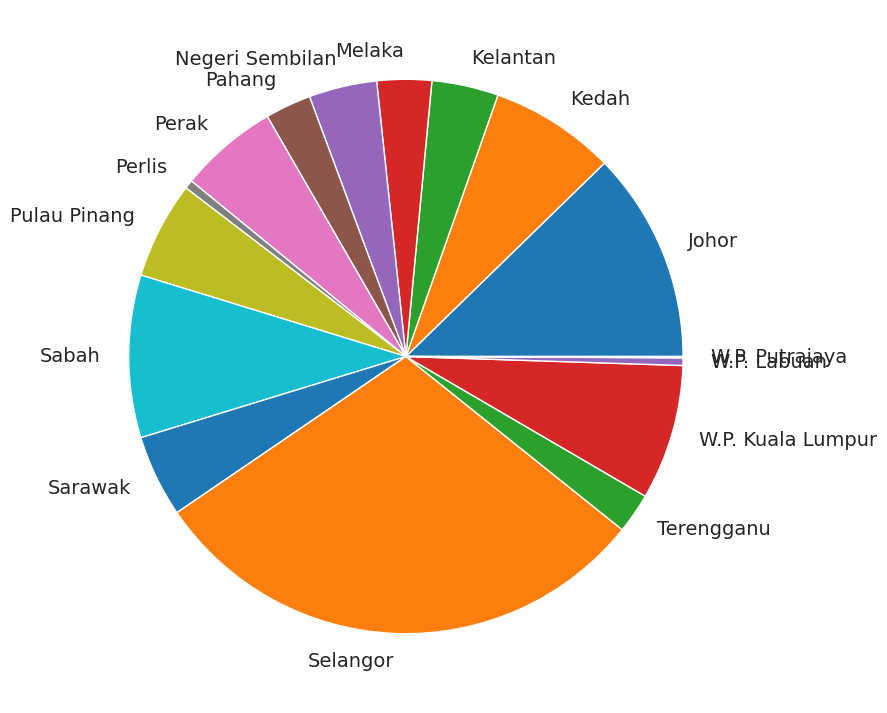

In [41]:
plt.pie(state_death, labels = state_death.index )

#### Q9: What is the overall death cases happened in W.P Kuala Lumpur?

In [53]:
KL_death = df.drop("deaths_tat", axis =1)
KL_death = KL_death.groupby('state').sum()
KL_death = KL_death.loc["W.P. Kuala Lumpur"]
KL_death

<ipython-input-53-1785142f5764>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  KL_death = KL_death.groupby('state').sum()


deaths_new        2861
deaths_bid         733
deaths_new_dod    2861
deaths_bid_dod     733
deaths_unvax      1825
deaths_pvax        629
deaths_fvax        356
deaths_boost        51
Name: W.P. Kuala Lumpur, dtype: int64

Text(0.5, 1.0, 'Overall death counts of KL')

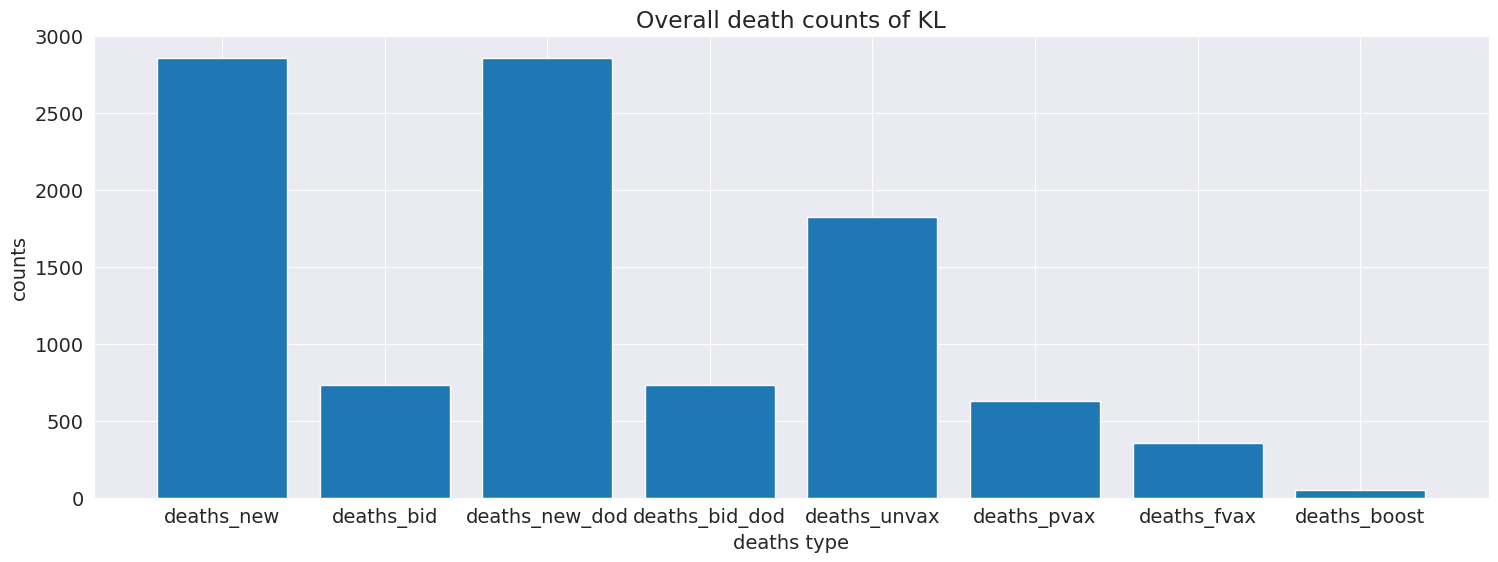

In [65]:
KL_death.index
plt.figure(figsize=(18,6))
plt.bar(KL_death.index, KL_death)
plt.xlabel("deaths type")
plt.ylabel("counts")
plt.title("Overall death counts of KL")

#### Q10: What is the importances of this case study?

This case study is important in the way that the policy makers can use it to predict or understand the situation of the virus outspread now, then for normal people(non-policy maker) also able to modify their travel plans and business owner also can do the risk assessment or decision like open service for delivery. Last but not least, investors can use it for indentifying which sector is worth to invest and which sector is cooling down due to the pandemic situations.

## Inferences and Conclusion

In Summary, throughout this project we can have a clearer understanding to the progress of the pandemic, and we can discover further details behind the data to understand what was going on. We also found the pattern of the death cases progression, deaths gradient and distribution of cases across the states, the monthly death cases in the time series and so on.

## References and Future Work

We could study further into the prediction of the death cases and virus propagation, and its impact to the economy, so that as a member of the society we are able to have a "smart move", especially we can discuss more on the area with more industrial facilities so that we know which sector might be affected the most.


> Malaysia, Ministry of Health. Covid-19 epidermic: Death cases based on states | Github. github.com/MoH-Malaysia. Retrieved November 8, 2023, from https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/deaths_state.csv

